Types of clustering algorithms available in Sci-Kit Learn

| Method name                  | Parameters                                                       | Scalability                                                 | Usecase                                                                   | Geometry (metric used)                       |
|------------------------------|------------------------------------------------------------------|-------------------------------------------------------------|---------------------------------------------------------------------------|----------------------------------------------|
| K-Means                      | number of clusters                                               | Very large n_samples, medium n_clusters with MiniBatch code | General-purpose, even cluster size, flat geometry, not too many clusters  | Distances between points                     |
| Affinity propagation         | damping, sample preference                                       | Not scalable with n_samples                                 | Many clusters, uneven cluster size, non-flat geometry                     | Graph distance (e.g. nearest-neighbor graph) |
| Mean-shift                   | bandwidth                                                        | Not scalable with n_samples                                 | Many clusters, uneven cluster size, non-flat geometry                     | Distances between points                     |
| Spectral clustering          | number of clusters                                               | Medium n_samples, small n_clusters                          | Few clusters, even cluster size, non-flat geometry                        | Graph distance (e.g. nearest-neighbor graph) |
| Ward hierarchical clustering | number of clusters or distance threshold                         | Large n_samples and n_clusters                              | Many clusters, possibly connectivity constraints                          | Distances between points                     |
| Agglomerative clustering     | number of clusters or distance threshold, linkage type, distance | Large n_samples and n_clusters                              | Many clusters, possibly connectivity constraints, non Euclidean distances | Any pairwise distance                        |
| DBSCAN                       | neighborhood size                                                | Very large n_samples, medium n_clusters                     | Non-flat geometry, uneven cluster sizes                                   | Distances between nearest points             |
| OPTICS                       | minimum cluster membership                                       | Very large n_samples, large n_clusters                      | Non-flat geometry, uneven cluster sizes, variable cluster density         | Distances between points                     |
| Gaussian mixtures            | many                                                             | Not scalable                                                | Flat geometry, good for density estimation                                | Mahalanobis distances to centers             |
| Birch                        | branching factor, threshold, optional global clusterer.          | Large n_clusters and n_samples                              | Large dataset, outlier removal, data reduction.                           | Euclidean distance between points            |



In [101]:
import pandas as pd

iris = pd.read_csv("../../Datasets/Iris.csv")

#I'm loading the data and the target, but often in clustering examples we won't have a target.
X = iris[["sepal_length", "petal_length", "petal_width"]].to_numpy()
labels_true = iris["species"]
print(X)
print(labels_true)



[[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]
 [5.4 1.7 0.4]
 [4.6 1.4 0.3]
 [5.  1.5 0.2]
 [4.4 1.4 0.2]
 [4.9 1.5 0.1]
 [5.4 1.5 0.2]
 [4.8 1.6 0.2]
 [4.8 1.4 0.1]
 [4.3 1.1 0.1]
 [5.8 1.2 0.2]
 [5.7 1.5 0.4]
 [5.4 1.3 0.4]
 [5.1 1.4 0.3]
 [5.7 1.7 0.3]
 [5.1 1.5 0.3]
 [5.4 1.7 0.2]
 [5.1 1.5 0.4]
 [4.6 1.  0.2]
 [5.1 1.7 0.5]
 [4.8 1.9 0.2]
 [5.  1.6 0.2]
 [5.  1.6 0.4]
 [5.2 1.5 0.2]
 [5.2 1.4 0.2]
 [4.7 1.6 0.2]
 [4.8 1.6 0.2]
 [5.4 1.5 0.4]
 [5.2 1.5 0.1]
 [5.5 1.4 0.2]
 [4.9 1.5 0.1]
 [5.  1.2 0.2]
 [5.5 1.3 0.2]
 [4.9 1.5 0.1]
 [4.4 1.3 0.2]
 [5.1 1.5 0.2]
 [5.  1.3 0.3]
 [4.5 1.3 0.3]
 [4.4 1.3 0.2]
 [5.  1.6 0.6]
 [5.1 1.9 0.4]
 [4.8 1.4 0.3]
 [5.1 1.6 0.2]
 [4.6 1.4 0.2]
 [5.3 1.5 0.2]
 [5.  1.4 0.2]
 [7.  4.7 1.4]
 [6.4 4.5 1.5]
 [6.9 4.9 1.5]
 [5.5 4.  1.3]
 [6.5 4.6 1.5]
 [5.7 4.5 1.3]
 [6.3 4.7 1.6]
 [4.9 3.3 1. ]
 [6.6 4.6 1.3]
 [5.2 3.9 1.4]
 [5.  3.5 1. ]
 [5.9 4.2 1.5]
 [6.  4.  1. ]
 [6.1 4.7 1.4]
 [5.6 3.6 1.3]
 [6.7 4.4 1.4]
 [5.6 4.5 

The most common clustering algorithm is K-Means clustering. 

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.


In [103]:
from sklearn.cluster import KMeans


k_means = KMeans(3)
k_means.fit(X)

labels_pred = k_means.predict(X)
print(labels_pred)




[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## Viewing the K-Means Clusters

Here we create a 3D scatter plot. Where each axis will correspond to a column of our original iris dataset.

We can plot each point of cluster as color them deterined by the cluster membership.
We can then plot the cluster centres which are the average values of all the members of that cluster.

Finally we can plot the original dataset, using the labels as colors to inpsect the truth.


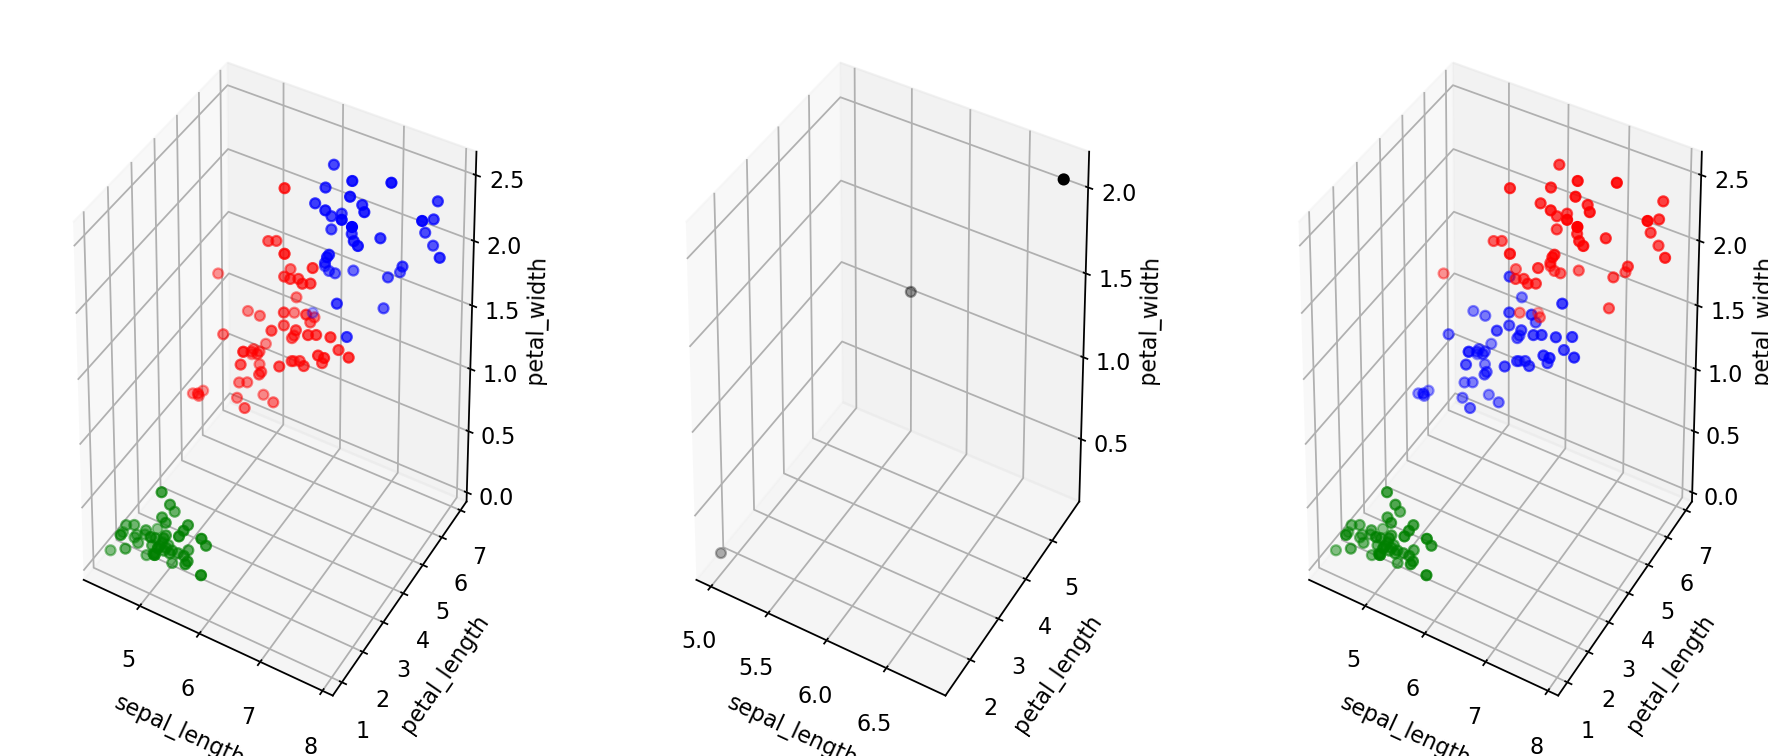

In [105]:
from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
colors = ["red", "green", "blue"]


fig = plt.figure(figsize=(14, 6), dpi=160)
ax = fig.add_subplot(1,3,1, projection='3d')
ax1 = fig.add_subplot(1,3,2, projection='3d')
ax2 = fig.add_subplot(1,3,3, projection='3d')

#map the colors to the labels
colors_map = list(map(lambda l: colors[l], labels_pred))

ax.scatter(X[:,0], X[:,1], X[:,2], c=colors_map)
ax.set_xlabel("sepal_length")
ax.set_ylabel("petal_length")
ax.set_zlabel("petal_width")

#plot the 3 cluster centres
flat_c= ["black","black","black"]
C = k_means.cluster_centers_

ax1.scatter(C[:,0], C[:,1], C[:,2], c=flat_c)
ax1.set_xlabel("sepal_length")
ax1.set_ylabel("petal_length")
ax1.set_zlabel("petal_width")

#transform the original data to a label encoding of 0,1,2
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoding = le.fit_transform(labels_true)

#map the encoding to the colors
colors1 = ["green","blue","red"]
colors_orig_map = list(map(lambda l: colors1[l], encoding))

ax2.scatter(X[:,0], X[:,1], X[:,2], c=colors_orig_map)
ax2.set_xlabel("sepal_length")
ax2.set_ylabel("petal_length")
ax2.set_zlabel("petal_width")


plt.show()

## Measuring the accuracy of Unsupervised learning methods

Rand index adjusted for chance.

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

The raw RI score is then “adjusted for chance” into the ARI score using the following scheme:

`ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)`

The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).



In [107]:
from sklearn.metrics.cluster import adjusted_rand_score


score = adjusted_rand_score(labels_true, labels_pred)
score

0.6946067115938924

Adjusted Mutual Information between two clusterings.

Adjusted Mutual Information (AMI) is an adjustment of the Mutual Information (MI) score to account for chance. It accounts for the fact that the MI is generally higher for two clusterings with a larger number of clusters, regardless of whether there is actually more information shared. For two clusterings
and the AMI is given as:

`AMI(U, V) = [MI(U, V) - E(MI(U, V))] / [avg(H(U), H(V)) - E(MI(U, V))]`

This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

In [109]:
from sklearn.metrics.cluster import adjusted_mutual_info_score


score = adjusted_mutual_info_score(labels_true, labels_pred)
score

0.70690662025224

# Heirachical Clustering

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample.

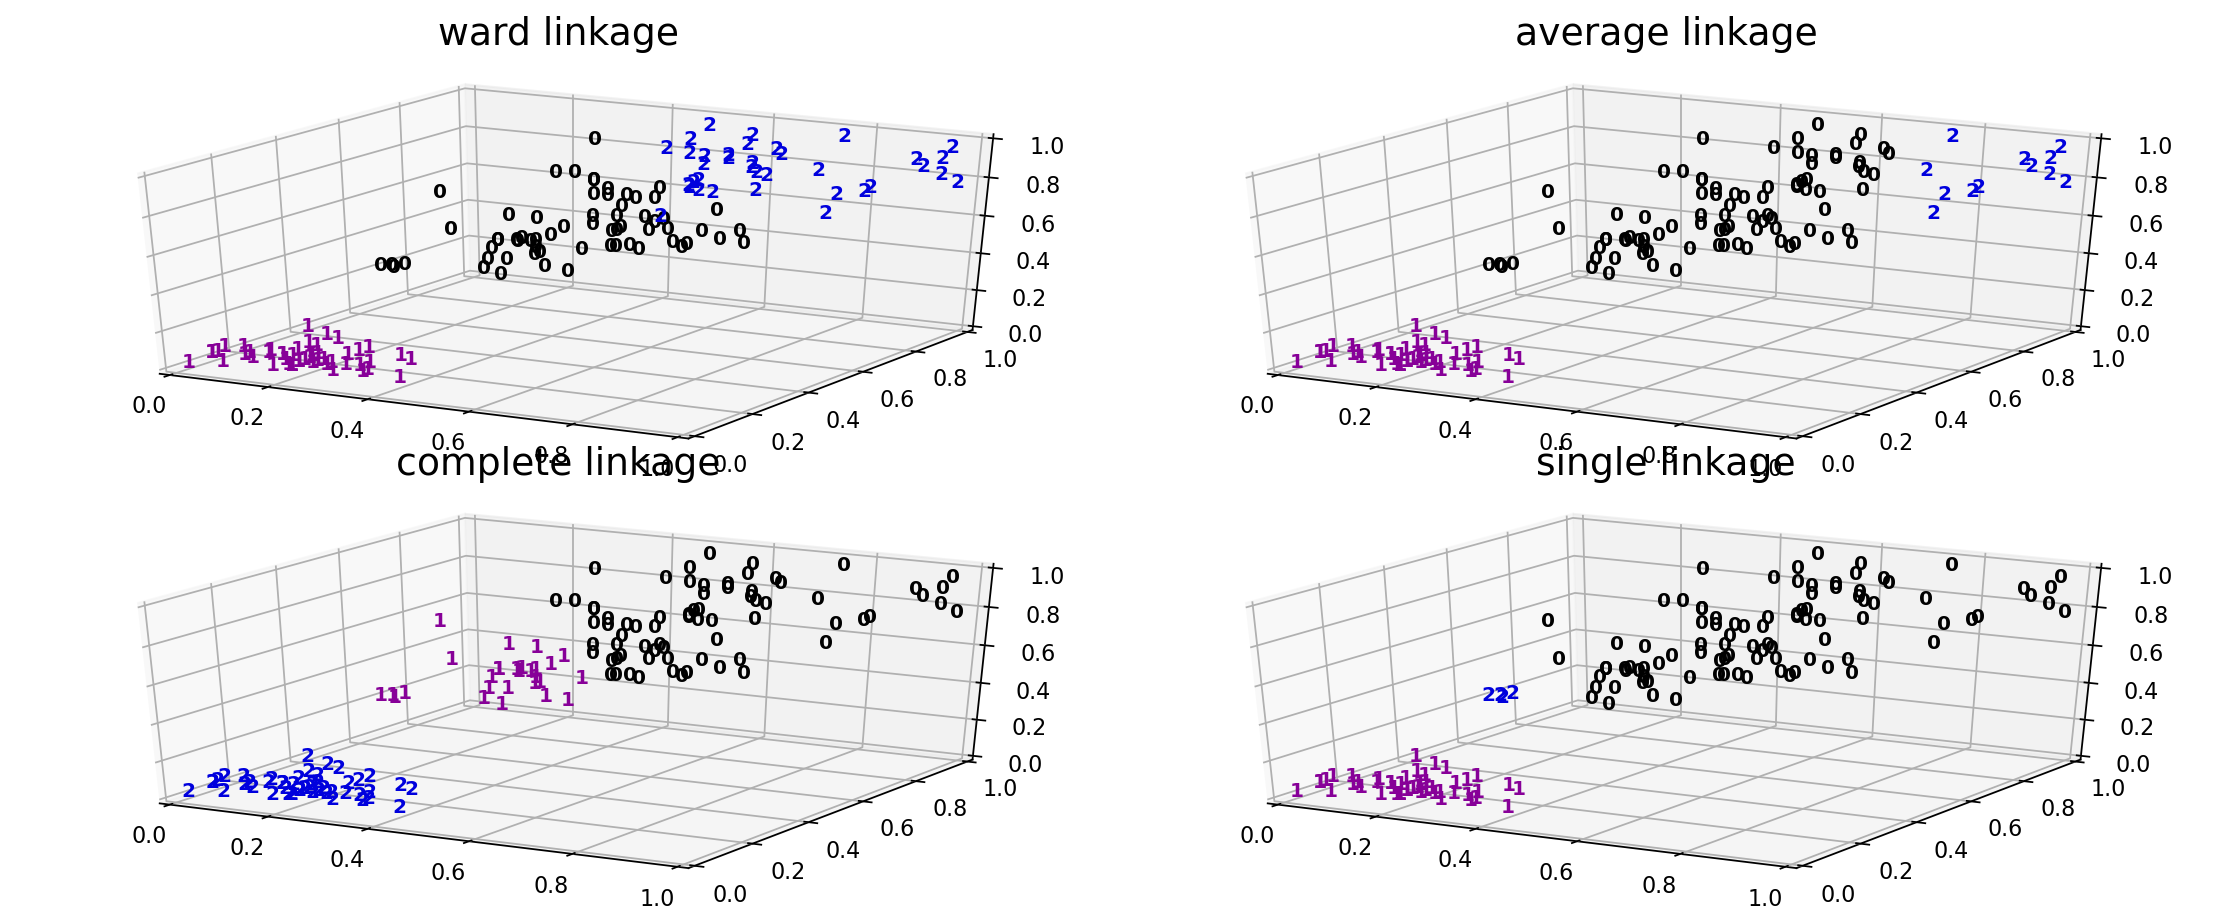

In [111]:
def plot_clustering(X_data, labels, title=None, ax=None):
    x_min, x_max = np.min(X_data, axis=0), np.max(X_data, axis=0)
    X_data = (X_data - x_min) / (x_max - x_min)


    for i in range(X_data.shape[0]):
        ax.text(X_data[i, 0], X_data[i, 1], X_data[i,2], str(labels[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if title is not None:
        ax.set_title(title, size=17)

from sklearn.cluster import AgglomerativeClustering

from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(14, 6), dpi=160)
ax = fig.add_subplot(2,2,1, projection='3d')
ax1 = fig.add_subplot(2,2,2, projection='3d')
ax2 = fig.add_subplot(2,2,3, projection='3d')
ax3 = fig.add_subplot(2,2,4, projection='3d')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

for ax_, linkage in zip( (ax,ax1,ax2,ax3),('ward', 'average', 'complete', 'single')):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    clustering.fit(X)
    plot_clustering(X, clustering.labels_, "%s linkage" % linkage, ax_)

We can use unsupervised to learn which features are strongly correlated with each other. This can be used as an unsupervised form of feature pruning.



In [112]:
from sklearn.cluster import FeatureAgglomeration


#we have 3 features in the Iris dataset. but we suspect that perhaps we can agglomerate them into 2 features.
agglo = FeatureAgglomeration(n_clusters = 2,linkage="average")
agglo.fit(X)

X_reduced = agglo.transform(X)

k_means = KMeans(3)
k_means.fit(X_reduced)

labels_pred = k_means.predict(X_reduced)
print(labels_pred)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


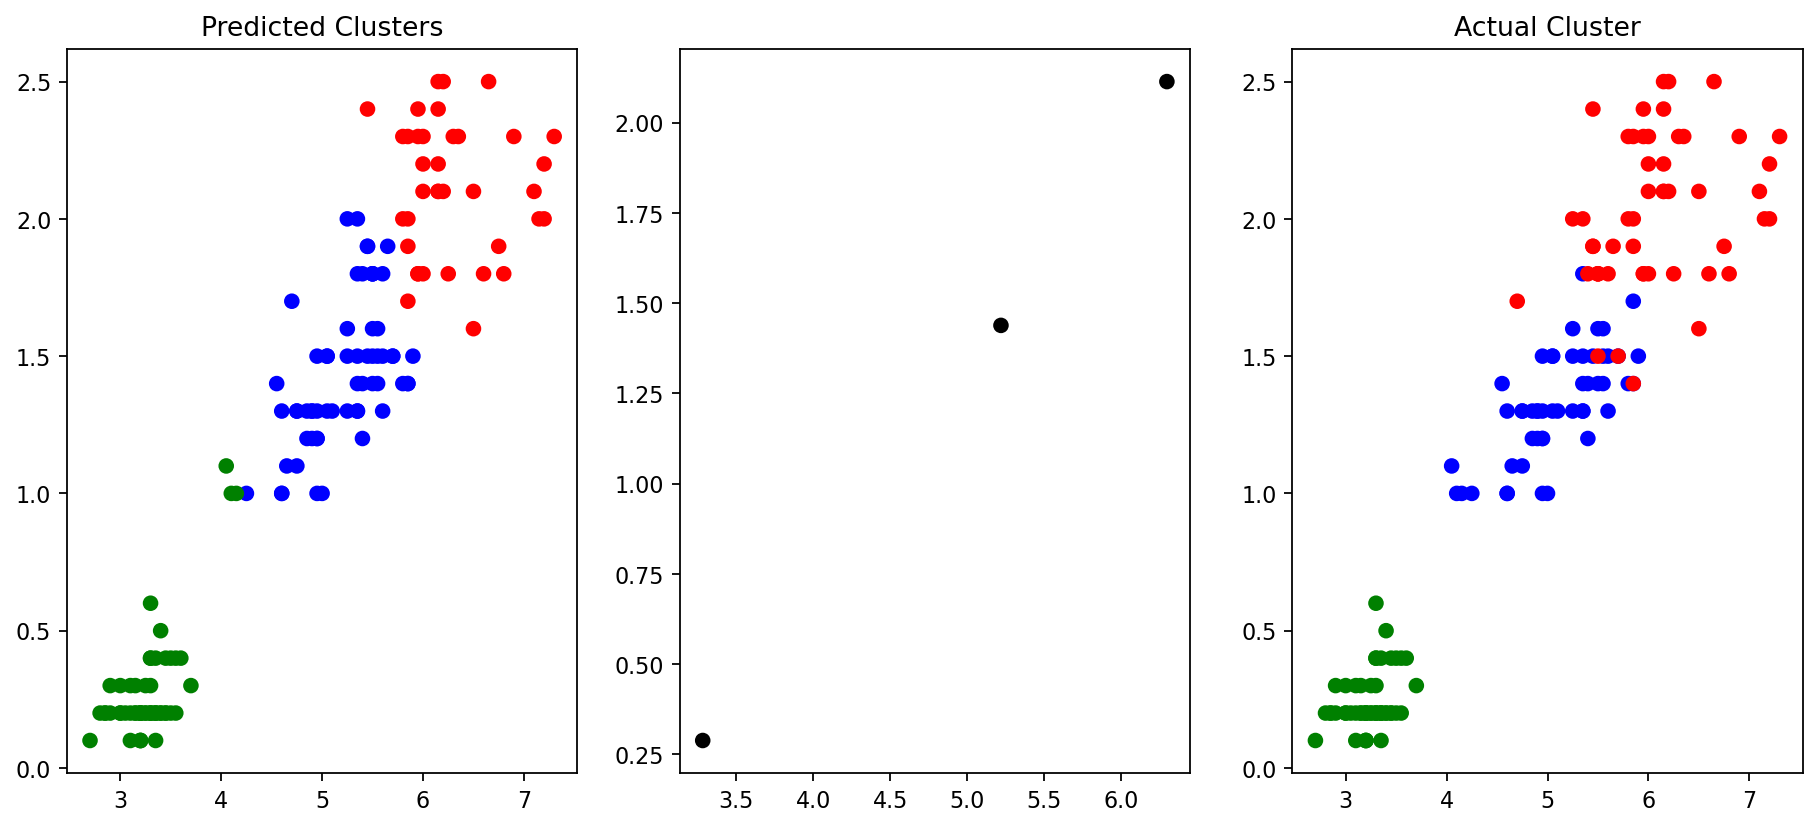

In [115]:
import matplotlib.pyplot as plt
colors = ["red", "green", "blue"]

fig = plt.figure(figsize=(14, 6), dpi=160)
ax = fig.add_subplot(1,3,1)
ax1 = fig.add_subplot(1,3,2)
ax2 = fig.add_subplot(1,3,3)

#map the colors to the labels
colors_map = list(map(lambda l: colors[l], labels_pred))
ax.set_title("Predicted Clusters")
ax.scatter(X_reduced[:,0], X_reduced[:,1], c=colors_map)

#plot the 3 cluster centres
flat_c= ["black","black","black"]
C = k_means.cluster_centers_

ax1.scatter(C[:,0], C[:,1], c=flat_c)

#map the encoding to the colors
colors1 = ["green","blue","red"]
colors_orig_map = list(map(lambda l: colors1[l], encoding))

ax2.scatter(X_reduced[:,0], X_reduced[:,1], c=colors_orig_map)
ax2.set_title("Actual Cluster")


plt.show()

In [114]:
from sklearn.metrics.cluster import adjusted_rand_score


score_reduced = adjusted_rand_score(labels_true, labels_pred)
print("Full features score", score)
print("Reduced Features score: ", score_reduced)

Full features score 0.70690662025224
Reduced Features score:  0.6946067115938924


In this workflow, we used the same clustering methods as before, but we used agglomerative clustering to reduced the feature space by recognising that some of the features were similar to each other.

We then re-fit our KMeans clustering algorithm on the reduced dataset and measured the performance versus the original full feature set. We see a reduction in score across the feature set compared with the original. In part because we went from 3 features to 2. On larger datasets this workflow may maintain accuracy or increase it by removing some of the noise in our data. 